In [196]:
import pandas as pd
import yfinance
from mpl_finance import candlestick_ohlc
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [12, 7]
plt.rc('font', size=14)

In [284]:
import yfinance as yf

infy = yf.Ticker("INFY.NS")

In [285]:
hist = infy.history(period="10d")
hist

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
2023-04-18 00:00:00+05:30,1269.949951,1269.949951,1253.099976,1259.349976,12430884,0.0,0.0
2023-04-19 00:00:00+05:30,1254.349976,1254.349976,1229.400024,1232.199951,11307230,0.0,0.0
2023-04-20 00:00:00+05:30,1230.699951,1237.849976,1221.400024,1223.400024,8621249,0.0,0.0
2023-04-21 00:00:00+05:30,1228.099976,1233.250000,1220.000000,1227.349976,8691352,0.0,0.0
2023-04-24 00:00:00+05:30,1228.000000,1230.000000,1218.000000,1226.300049,8313774,0.0,0.0
2023-04-25 00:00:00+05:30,1225.949951,1235.500000,1215.000000,1224.900024,6808576,0.0,0.0
2023-04-26 00:00:00+05:30,1228.000000,1233.000000,1220.550049,1227.550049,5680192,0.0,0.0
2023-04-27 00:00:00+05:30,1230.000000,1247.800049,1225.400024,1246.250000,8020704,0.0,0.0
2023-04-28 00:00:00+05:30,1255.699951,1259.000000,1244.949951,1252.750000,10118277,0.0,0.0


In [286]:
df = pd.DataFrame(hist)

In [343]:
name = 'INFY.NS'
ticker = yfinance.Ticker(name)
df = ticker.history(interval="5d",start="2023-01-01")
df['Date'] = range(df.shape[0])
df = df.loc[:,['Date', 'Open', 'High', 'Low', 'Close']]

In [344]:
df.head()

,Date,Open,High,Low,Close
Date,,,,,
2023-01-05 00:00:00+05:30,0,1505.900024,1505.900024,1469.250000,1475.199951
2023-01-10 00:00:00+05:30,1,1482.000000,1483.900024,1454.050049,1469.750000
2023-01-20 00:00:00+05:30,2,1538.000000,1545.000000,1524.000000,1525.550049
2023-01-25 00:00:00+05:30,3,1547.000000,1556.000000,1538.750000,1543.000000
2023-01-30 00:00:00+05:30,4,1528.800049,1544.000000,1520.000000,1538.800049


In [345]:
df_ha = df.copy()


for i in range(df_ha.shape[0]):
    if i == 0:
        df_ha.loc[df_ha.index[i],'Open'] = (df['Open'][i] + df['Close'][i])/2
        
    else: 
        df_ha.loc[df_ha.index[i],'Open'] = (df_ha['Open'][i-1] + df_ha['Close'][i-1])/2
  
    df_ha.loc[df_ha.index[i],'Close'] = (df['Open'][i] + df['Close'][i] + df['Low'][i] +  df['High'][i])/4
    df_ha.loc[df_ha.index[i],'High'] = max([df['High'][i] , df_ha['Open'][i] , df_ha['Close'][i]])
    df_ha.loc[df_ha.index[i],'Low'] = min([df['Low'][i] , df_ha['Open'][i] , df_ha['Close'][i]])
    
# df_ha = df_ha.iloc[1:,:]

In [346]:
df_ha.tail()

,Date,Open,High,Low,Close
Date,,,,,
2023-04-05 00:00:00+05:30,13,1421.824320,1427.500000,1400.000000,1412.762512
2023-04-10 00:00:00+05:30,14,1417.293416,1434.000000,1415.000000,1425.137482
2023-04-20 00:00:00+05:30,15,1421.215449,1421.215449,1221.400024,1228.337494
2023-04-25 00:00:00+05:30,16,1324.776471,1324.776471,1215.000000,1225.337494
2023-05-02 00:00:00+05:30,17,1275.056983,1279.750000,1254.550049,1266.575012


In [349]:
def plot_chart(df):
    fig, ax = plt.subplots()
    candlestick_ohlc(ax,df.values,width=0.6, 
                   colorup='green', colordown='red', alpha=1)
    fig.tight_layout()
    fig.show()

C:\Users\Mayur\AppData\Local\Temp\ipykernel_7532\3270876252.py:6: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


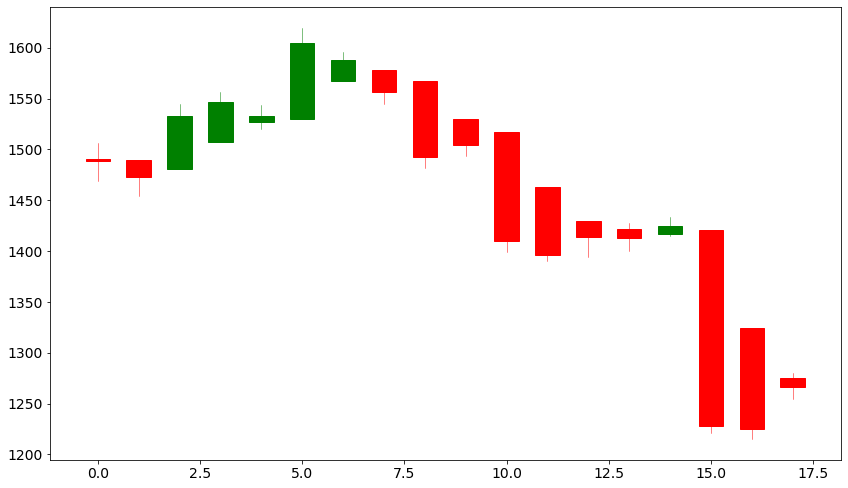

In [350]:
plot_chart(df_ha)


In [237]:
df_ha

,Date,Open,High,Low,Close
Date,,,,,
2023-04-24 00:00:00+05:30,1,1227.724976,1230.000000,1218.000000,1225.575012
2023-04-25 00:00:00+05:30,2,1227.150024,1235.500000,1215.000000,1225.337494
2023-04-26 00:00:00+05:30,3,1225.424988,1233.000000,1220.550049,1227.275024
2023-04-27 00:00:00+05:30,4,1227.775024,1247.800049,1225.400024,1237.362518
2023-04-28 00:00:00+05:30,5,1238.125000,1259.000000,1244.949951,1253.099976


In [280]:
df

,Date,Open,High,Low,Close
Date,,,,,
2023-04-17 00:00:00+05:30,0,1250.300049,1261.150024,1185.300049,1258.300049
2023-04-18 00:00:00+05:30,1,1269.949951,1269.949951,1253.099976,1259.349976
2023-04-19 00:00:00+05:30,2,1254.349976,1254.349976,1229.400024,1232.199951
2023-04-20 00:00:00+05:30,3,1230.699951,1237.849976,1221.400024,1223.400024
2023-04-21 00:00:00+05:30,4,1228.099976,1233.250000,1220.000000,1227.349976
2023-04-24 00:00:00+05:30,5,1228.000000,1230.000000,1218.000000,1226.300049
2023-04-25 00:00:00+05:30,6,1225.949951,1235.500000,1215.000000,1224.900024
2023-04-26 00:00:00+05:30,7,1228.000000,1233.000000,1220.550049,1227.550049
2023-04-27 00:00:00+05:30,8,1230.000000,1247.800049,1225.400024,1246.250000


In [ ]:
### check infy not consistent on 17th april